In [1]:
import pandas as pd 
import csv
import os

In [8]:
pwd = os.getcwd()

Importing excel file as a data frame for easier manipulation

In [13]:
df_raw = pd.read_excel('excel_records_forever_cleaned_datetime.xlsx', index_col=0)

Creating a copy for faster analysis and changes, can always revert back to original

In [60]:
df = df_raw.copy()
df

,address,abuse_type_id,abuse_type_other,abuser,description,from_country,from_country_code,date,time
id,,,,,,,,,
1,12t9YDPgwueZ9NyMgw519p7AA8isjr6SMw,1,NaN,wannacry,https://bitcointalk.org/index.php?topic=1916199.0,NaN,NaN,2017-05-16,04:28:13
2,115p7UMMngoj1pMvkpHijcRdfJNXj6LrLn,1,NaN,wannacry,https://bitcointalk.org/index.php?topic=1916199.0,NaN,NaN,2017-05-16,04:31:17
3,13AM4VW2dhxYgXeQepoHkHSQuy6NgaEb94,1,NaN,wannacry,https://bitcointalk.org/index.php?topic=1916199.0,NaN,NaN,2017-05-16,04:33:39
4,13AM4VW2dhxYgXeQepoHkHSQuy6NgaEb94,1,NaN,wannacry,this bitcoin address is used to support wananc...,NaN,NaN,2017-05-29,11:55:42
6,1Doho93x24sbs4jyPw6wn87xjQSuFS8wrt,99,"Account Hacked, and hacker attempted to use bi...",Poloniex,"Account Hacked, and hacker attempted to use bi...",NaN,NaN,2017-07-06,08:18:10
...,...,...,...,...,...,...,...,...,...
389871,16GT7uMGphpzNWhpQDiz61Q18VTW7Kie53,4,NaN,spoofed my email,"While gathering information about you, I have ...",United States,US,2022-04-15,00:21:40
389872,bc1qq65l0nmujs6kul9c50lr5rw36vf2upg28xg8c7,2,NaN,KADIR ERDOGDU,Stole money,United States,US,2022-04-15,00:45:10
389873,3Kr89dRHYbFQT2t8DkxhX7X9fRWCqQJ2Hr,1,NaN,Not indicated,Ransomware. Sexortion,Singapore,SG,2022-04-15,01:18:04


Dropping the description and abuser column as they are not useful in this analysis, could be useful later in Natural Language Processing (NLP)

In [61]:
df = df.drop(['description', 'abuser', 'abuse_type_other'], axis=1)

I want a sample set of data with values so I will drop any row with NaN in any column

In [ ]:
df.dropna(subset=['from_country', 'from_country_code'], inplace=True)
df

In [64]:
df.dtypes

address              object
abuse_type_id         int64
from_country         object
from_country_code    object
date                 object
time                 object
dtype: object

In [ ]:
df['datetime'] = df['date'] + " " + df['time']
df

Date and Time need to be changed from objects to datetime

In [67]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')
df['address'] = df['address'].astype('str')
df['abuse_type_id'] = df['abuse_type_id'].astype('int64')
df['from_country'] = df['from_country'].astype('str')
df['from_country_code'] = df['from_country_code'].astype('str')

In [ ]:
df = df.drop(['date', 'time'], axis = 1)
df

In [ ]:
df[df[['address', 'from_country', 'abuse_type_id', 'datetime']].duplicated() == True].sort_values('address')

In [ ]:
df.drop_duplicates()
df

Changing the abuse_type_id to their correct names

In [ ]:
df['abuse_type_id'] = df['abuse_type_id'].replace(to_replace=[1, 2, 3, 4, 5, 99], value=['ransomeware', 'darknet market', 'bitcoin tumbler', 'blackmail scam', 'sextortion', 'other'])

df

array([[<AxesSubplot:title={'center':'datetime'}>]], dtype=object)

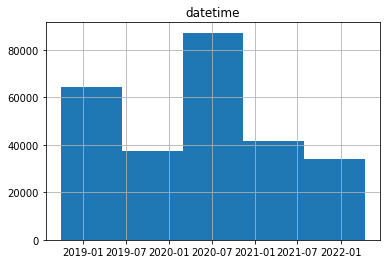

In [74]:
df.hist(column='datetime', bins=5)

In [123]:
Offender_Accounts = df['address'].value_counts() .reset_index()
Offender_Accounts

,index,address
0,3K3vVqkxeDeD8Qbex4MzXe2WdAcfw2WXzF,966
1,1LfYcbCsssB2niF3VWRBTVZFExzsweyPGQ,927
2,1EZS92K4xJbymDLwG4F7PNF5idPE62e9XY,455
3,145SmyE7DBEQExsnXZobojbQqr5UdgbCHh,425
4,1N6dubqFmnyQ2qDWvi32ppVbc3kKMTYcGW,424
...,...,...
81547,132apKgBFmSM9gnkJBDTii8swxcN2m9gi3,1
81548,1MfdfrPVSRegFS5JR4MrjbE316LWvd2vU6,1
81549,1AmPorHbVCK7dBeDSVq23WoohWyZk3hg2C,1
81550,14KctaT9LPYut1BPC8SNsQG6wRTFauXHyy,1


In [93]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [99]:
unique_addresses = pd.unique(df['address'])
print(len(unique_addresses))

81552


In [113]:
df_unique = pd.DataFrame(unique_addresses, columns=['unique_address'])
df_unique['count'] = Offender_Accounts

In [128]:
df_count = pd.DataFrame(Offender_Accounts)


In [132]:
df_count .rename(columns={'Address':'address', 'address':'report_count'}, inplace=True)

In [138]:
top_offender_by_address = df_count[df_count['report_count'] >= 300]
top_offender_by_address

,address,report_count
0,3K3vVqkxeDeD8Qbex4MzXe2WdAcfw2WXzF,966
1,1LfYcbCsssB2niF3VWRBTVZFExzsweyPGQ,927
2,1EZS92K4xJbymDLwG4F7PNF5idPE62e9XY,455
3,145SmyE7DBEQExsnXZobojbQqr5UdgbCHh,425
4,1N6dubqFmnyQ2qDWvi32ppVbc3kKMTYcGW,424
5,1DKeRSqnY24m6qEBLshJtshhcMjhMmfYot,411
6,1HctxwLwjEFCacTPi83me927UBs7aTJ7LF,403
7,1AVSEj7UKjadhWCjcPcC1mbS5VVv89Hvgb,379
8,1KghHpjrMtpEDEScJ3TqDiXEZhTjZsbf24,376
9,1EiJMyvw2NP6T6vyWQ81HgUfBUVT1mqZkM,376


Creating a horizontal bar graph for better data viewing

/tmp/ipykernel_88939/1005470880.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


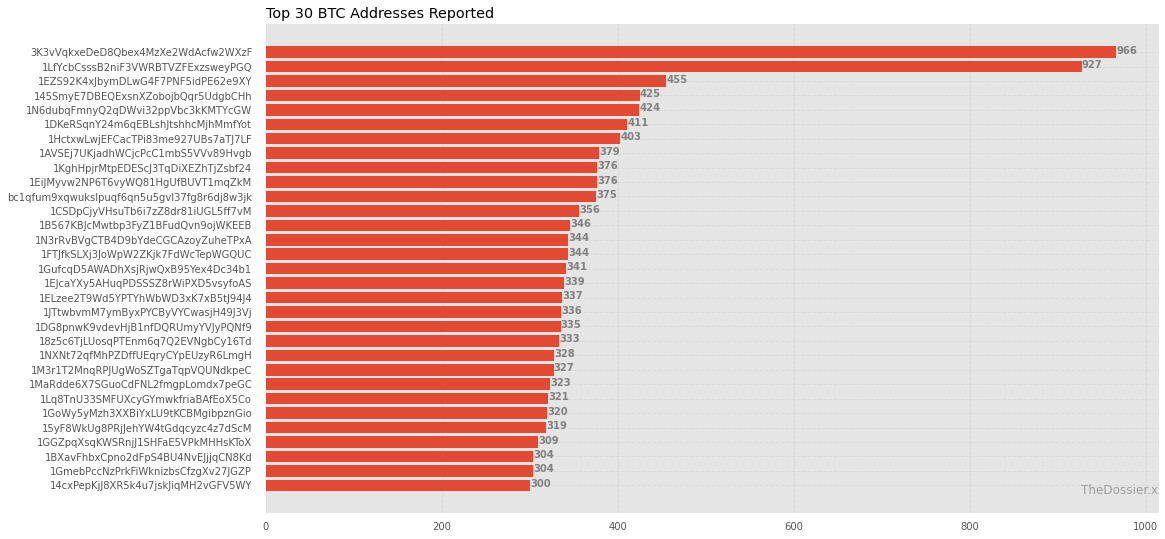

In [142]:
address = top_offender_by_address['address']
report_count = top_offender_by_address['report_count']

#Figure Size
fig, ax = plt.subplots(figsize= (16,9))

# Horizontal bar plot
ax.barh(address, report_count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 30 BTC Addresses Reported',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'TheDossier.x', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [148]:
import seaborn as sns

How many reports per month were there?

<AxesSubplot:xlabel='datetime', ylabel='Count'>

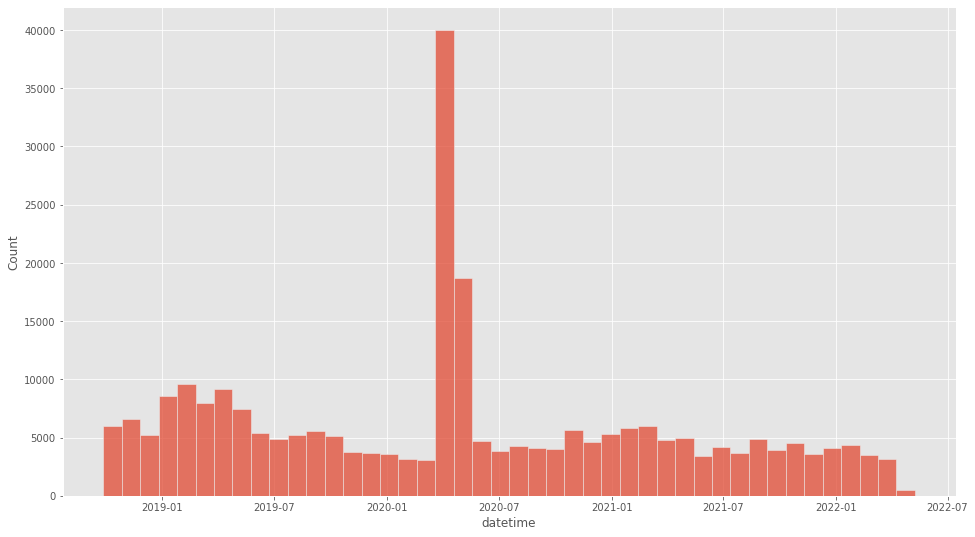

In [155]:
plt.figure(figsize=(16,9))

sns.histplot(data=df, x='datetime', binwidth=30)

Looks like there were a substantial amount of reported BTC abuses in April and May of 2020

In [ ]:
Offender_Countries = df['from_country'].value_counts() .reset_index()
Offender_Countries

In [157]:
Offender_Countries.rename(columns={'index':'country', 'from_country':'report_count'}, inplace=True)

In [ ]:
Offender_Countries

In [161]:
top_offender_countries = Offender_Countries[Offender_Countries['report_count'] >= 650]
top_offender_countries

,country,report_count
0,United States,73467
1,United Kingdom,21016
2,Canada,14358
3,Germany,12935
4,France,9718
5,Netherlands,9526
6,Russia,6757
7,Australia,6597
8,Poland,5809
9,Japan,5292


/tmp/ipykernel_88939/2817730115.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


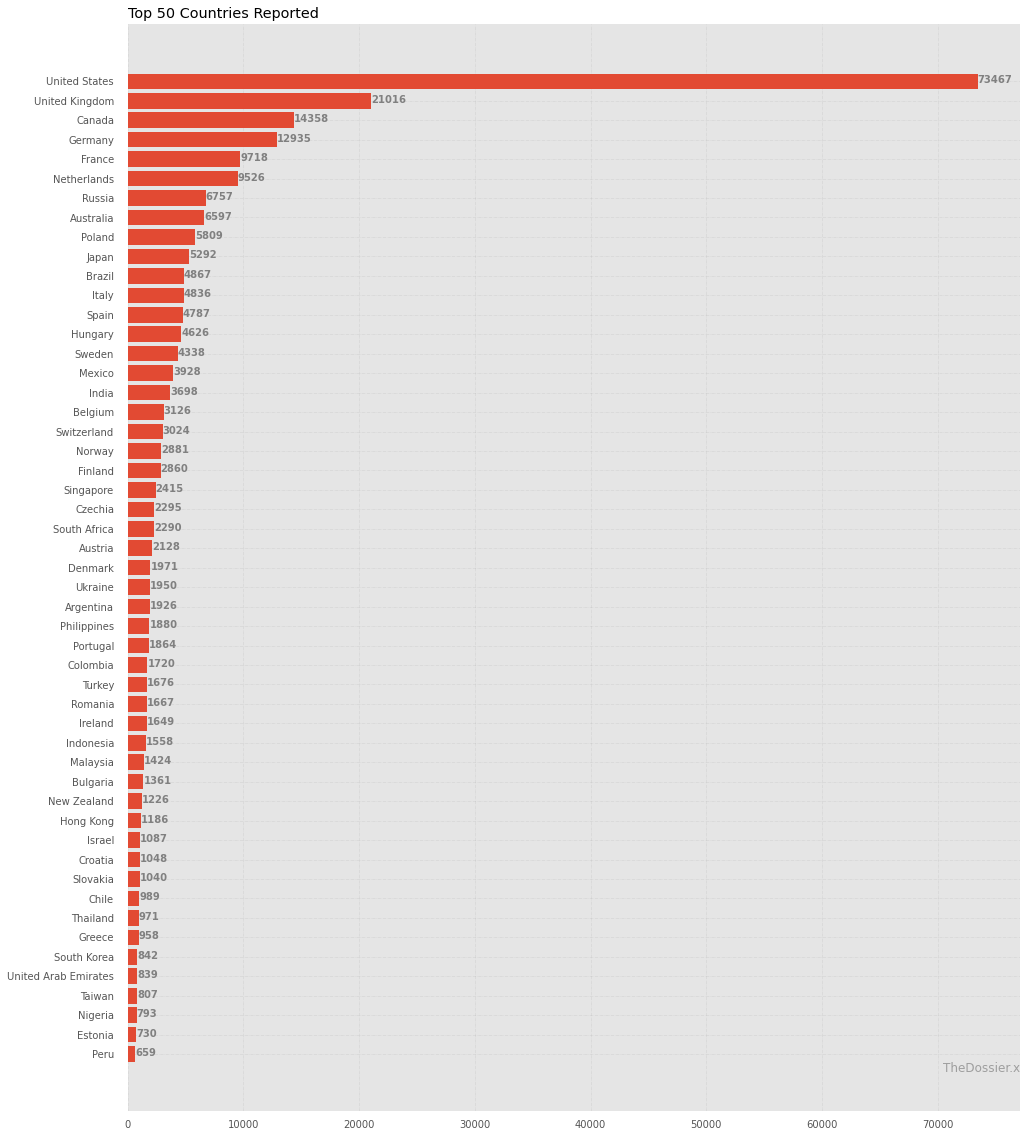

In [162]:
country = top_offender_countries['country']
report_count = top_offender_countries['report_count']

#Figure Size
fig, ax = plt.subplots(figsize= (16,20))

# Horizontal bar plot
ax.barh(country, report_count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Top 50 Countries Reported',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'TheDossier.x', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

This does not display the countries of origin for BTC Abuses but rather the most targeted countries for the different scams